In [55]:
import pandas as pd

df = pd.read_csv("D:/ML-Projects/house-price-prediction/dataset/House Price Prediction Dataset.csv")
print(df.shape)
print(df.columns.tolist())
df.head()

(2000, 10)
['Id', 'Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt', 'Location', 'Condition', 'Garage', 'Price']


,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [56]:
#dropping the Id because it will not help in anyway in predicting the price

df = df.drop(columns=["Id"])

In [57]:
#now i am checking if there is any missing values inside the dataset 

print(df.isnull().sum())

Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64


In [58]:
# this df.describe() is one of the most powerful first steps in exploring a dataset it helps and gives the 
#summary statistics of our numeric columns like count(no. of non null values), mean, std(spread of values), min, max 
#25%(1st quartile means 25% of values are below this) , 50%(median, means middle value — 50% are below this ), 
#3rd quartile(75% of values are below this)

# by these data we can interpret
# There are 2000 rows of data.
# Average house size is 2786 sq ft.
# Smallest house is 501 sq ft, biggest is 4999 sq ft.
# 50% of homes are smaller than 2833 sq ft (the median).
# The spread(std dev) is 1295 — meaning house sizes vary a lot.

#this dtypes will tell what the type of column is like int64 means numeric and object is in text 
#but the model understands numeric and we will change into numeric.

print(df.describe()) #include='all'
print(df.dtypes)


              Area     Bedrooms   Bathrooms       Floors    YearBuilt  \
count  2000.000000  2000.000000  2000.00000  2000.000000  2000.000000   
mean   2786.209500     3.003500     2.55250     1.993500  1961.446000   
std    1295.146799     1.424606     1.10899     0.809188    35.926695   
min     501.000000     1.000000     1.00000     1.000000  1900.000000   
25%    1653.000000     2.000000     2.00000     1.000000  1930.000000   
50%    2833.000000     3.000000     3.00000     2.000000  1961.000000   
75%    3887.500000     4.000000     4.00000     3.000000  1993.000000   
max    4999.000000     5.000000     4.00000     3.000000  2023.000000   

               Price  
count    2000.000000  
mean   537676.855000  
std    276428.845719  
min     50005.000000  
25%    300098.000000  
50%    539254.000000  
75%    780086.000000  
max    999656.000000  
Area          int64
Bedrooms      int64
Bathrooms     int64
Floors        int64
YearBuilt     int64
Location     object
Condition    ob

In [59]:
#from above we can see garage is our categorial we will change into numeric like this.
df["Garage"] = df["Garage"].map({"Yes": 1, "No": 0})

In [60]:
# okay now this is One hot encoding so why we did this when we have categorial into numeric. 
# what's the difference from above so the difference is that we do when there is no ranking between the categories
# like for example -"Color" could have categories like "Red", "Green", "Blue". These categories don't have a ranking, 
#so One-Hot Encoding treats them as independent columns.

df_encoded = pd.get_dummies(df, columns=["Location", "Condition"], drop_first=True)

In [61]:
print(df_encoded.columns)

Index(['Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt', 'Garage',
       'Price', 'Location_Rural', 'Location_Suburban', 'Location_Urban',
       'Condition_Fair', 'Condition_Good', 'Condition_Poor'],
      dtype='object')


In [62]:
import numpy as np
import matplotlib.pyplot as plt

X = df_encoded['Area'].values
y = df_encoded['Price'].values

X = X / 1000
y = y / 10000

X = X.reshape(-1)
y = y.reshape(-1)

In [63]:
m = 0.0
b = 0.0
lr = 0.01
epochs = 1000

loss_history = []

In [64]:
for i in range(epochs):
    y_pred = m * X + b
    error = y - y_pred
    loss = np.mean(error ** 2)
    loss_history.append(loss)

    
    dm = -2 * np.mean(X * error)
    db = -2 * np.mean(error)

   
    m = m - lr * dm
    b = b - lr * db

    if i % 100 == 0:
        print(f"Epoch {i}: Loss = {loss:.4f}, m = {m:.4f}, b = {b:.4f}")


Epoch 0: Loss = 3654.7110, m = 2.9973, b = 1.0754
Epoch 100: Loss = 987.9213, m = 10.6612, b = 18.2902
Epoch 200: Loss = 880.3482, m = 7.6981, b = 28.1555
Epoch 300: Loss = 824.3951, m = 5.5611, b = 35.2704
Epoch 400: Loss = 795.2916, m = 4.0199, b = 40.4017
Epoch 500: Loss = 780.1537, m = 2.9084, b = 44.1025
Epoch 600: Loss = 772.2799, m = 2.1067, b = 46.7715
Epoch 700: Loss = 768.1845, m = 1.5285, b = 48.6964
Epoch 800: Loss = 766.0542, m = 1.1116, b = 50.0847
Epoch 900: Loss = 764.9462, m = 0.8109, b = 51.0859


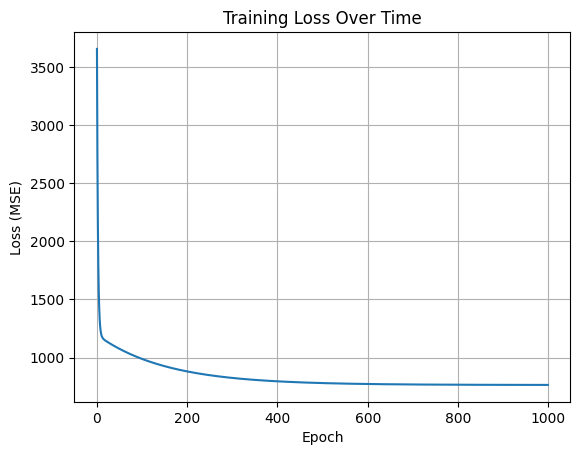

In [65]:
plt.plot(loss_history)
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("Training Loss Over Time")
plt.grid(True)
plt.show()

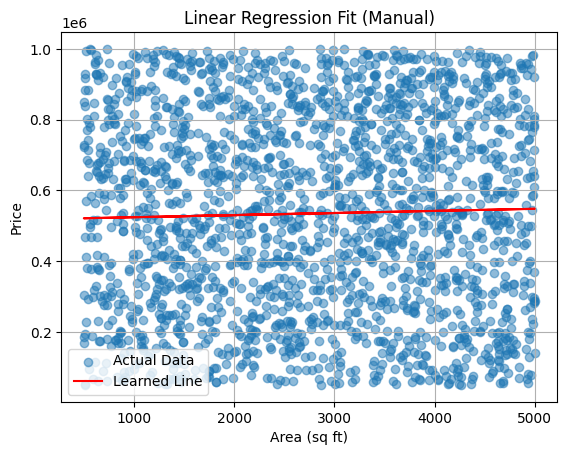

In [66]:
X_actual = X * 1000
y_actual = y * 10000

y_line = m * X + b
y_line = y_line * 10000 

import matplotlib.pyplot as plt

plt.scatter(X_actual, y_actual, alpha=0.5, label="Actual Data")
plt.plot(X_actual, y_line, color='red', label="Learned Line")
plt.xlabel("Area (sq ft)")
plt.ylabel("Price")
plt.legend()
plt.title("Linear Regression Fit (Manual)")
plt.grid(True)
plt.show()
